In [1]:
%matplotlib notebook 
# Import modules
import math
import numpy as np
import matplotlib.pyplot
import tables as tb

def merge(a,b):
    final = np.zeros (len(a)+len(b))
    for i in range(len(a)):
        final[2*i]   = a[i]
        final[2*i+1] = b[i]
    return final

def read_keff_h5(file):
    db = tb.open_file(file, mode='r')
    sim_param = db.root.simulation_parameters
    init_param = db.root.initial_depcode_siminfo
    # Keff at t=0 depletion step
    k_0 = np.array([x['keff_bds'][0] for x in sim_param.iterrows()])
    k_0_e = np.array([x['keff_bds'][1] for x in sim_param.iterrows()])
    # Keff at t=end depletion step
    k_1 = np.array([x['keff_eds'][0] for x in sim_param.iterrows()])
    k_1_e = np.array([x['keff_eds'][1] for x in sim_param.iterrows()])
    depstep = [x['depletion_timestep'] for x in init_param.iterrows()][0]
    db.close()
    day = depstep*np.arange(len(k_0))
    return day, k_0, k_1, k_0_e, k_1_e, depstep

In [2]:
db_file = '/home/andrei2/Desktop/git/saltproc/develop/saltproc/data/db_saltproc.h5'
days, k_bds, k_eds, k_bds_err, k_eds_err, dep_step = read_keff_h5(db_file)
days2 = np.linspace(dep_step, (len(k_eds))*(dep_step), num=len(k_eds), endpoint=True)
print(dep_step, days, days2)

3.0 [  0.00000000e+00   3.00000000e+00   6.00000000e+00 ...,   7.53900000e+03
   7.54200000e+03   7.54500000e+03] [  3.00000000e+00   6.00000000e+00   9.00000000e+00 ...,   7.54200000e+03
   7.54500000e+03   7.54800000e+03]


<IPython.core.display.Javascript object>


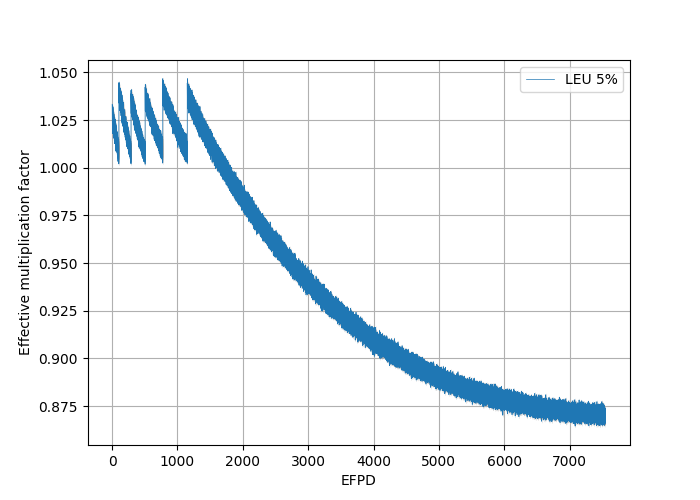

In [6]:
keff = merge(k_bds, k_eds)
efpd = merge(days, days2)
err = merge(k_bds_err, k_eds_err)

# Initialize figure
fig_keff_2 = matplotlib.pyplot.figure(2, figsize=[7,5])
ax = fig_keff_2.add_subplot(111)
ax.grid(True)
ax.plot(efpd, keff, '-', label='LEU 5%', linewidth=0.5, markerfacecolor="None")
#ax.plot(efpd_5, keff_5, '-', label='LEU 5%', linewidth=0.5, markerfacecolor="None", alpha=0.8)

ax.fill_between(efpd, keff-err, keff+err, edgecolor='#808080', facecolor='#BEBEBE', linewidth=0.1)

ax.legend(loc=0)
ax.set_ylabel('Effective multiplication factor')
ax.set_xlabel('EFPD')
#ax.set_title('Multiplication factor for online reprocessing case ' + str(EOS) +' days')
#ax.set_xlim(0,max(days2))
#ax.set_ylim([0.75, 1.018])
# zoomed 2
#ax.set_ylim(0.915, 0.963)
# zoomed 1
#ax.set_ylim(0.98, 1.018)
#ax.set_xlim(0, 1300)
#ax.set_ylim(1., 1.045)

fig_keff_2.show()
#fig_keff_2.savefig('/home/andrei2/Desktop/git/meitner-task-2/doc/2019-06-q4-report/figures/keff_3.png',bbox_inches='tight', dpi=700)
#fig_keff_2.savefig('/home/andrei2/Desktop/git/meitner-task-2/doc/2019-06-q4-report/figures/keff_zoomed_1.png',bbox_inches='tight', dpi=700)